# The King of House Renovation

King Renovators is looking for a way to help find homes that are below market value that they can buy, remodel, and sell for a profit, as well as what home features can help increase the properties values. King county Washington, the home to Seattle, is one of the hottest housing markets in the country with a lot of potential for profits to be made in buying homes that are below market, remodeling and adding features that improve the value of the property and selling for a profit. However, King county has a large number of properties and it would be impossible for someone to, quickly and thoroughly find homes that have potential to be profitable by hand. This is where we can use historical data to help predict the homes values based on the features and find homes that have potential to be profitable.

To achieve the companies goals we will be looking at historical data from home sales in King County to build a model to help us identify what features have the biggest impact on the price of a home, as well as what percentage of a home value can be predicted by the known features from our dataset. Then can we use our results to identify homes that have potential to be flipped for a profit.

- What features have the largest impact on the price of a home?
- Can we accurately predict the price of a home based on the known variables?
- Can we use our model to identify homes that are under their predicted market value?

We can do this by testing our hypothesis and checking relative to our null hypothesis
- Hypothesis: The independent variables have an effect on the dependent variable of home price and can be used to estimate the sale price of the home.
- Null Hypothesis: The independent variables have no correlation or statistical correlation to the dependent variable of home price and cannot be used to estimate the home price. 


In [1]:
#Start by importing packages and libraries that we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.api as sms

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
linreg = LinearRegression()
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE
from statsmodels.compat import lzip

In [3]:
import statsmodels.api as sm

In [4]:
#import data and get it into a dataframe
data = pd.read_csv('data/kc_house_data.csv')

In [5]:
#taking a quick look at the data we can see the columns, their names and how many non-null entries there are. 
#It appears that most columns are not missing any values, but some, such as yr_renovated are missing many values. 
#The missing values are likely due to there being nothing to report in that category. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#Lets look at some of the rows of data so that we can see what values are in place of our variables.
data

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [7]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [8]:
#drop the id column as it just identifies the house sale and has no affect on this project.
data = data.drop('id', axis=1)

# Clean Data

Lets start by getting all of our data into a usable format, and fix or remove any missing values as we cannot have missing values in our model. 

### Grade

Grade is a measure of the homes build quality and overall construction and design. It is on a scale of 1-12.

In [9]:
#grade needs to be converted to an numerical value, it is currently is a string.
data.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [10]:
# remove the label for the numberical values and convert the grade to a float.
data['grade'] = data['grade'].str[:2]
data.grade = data.grade.astype(float)

In [11]:
#grade is now usable.
data.grade.value_counts()

7.0     8974
8.0     6065
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      89
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

### View

View is a range of the homes views, from none to excellent.

In [12]:
#View is currently broken into categorical variables but can be converted dummy variables or int variables. 
data.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [13]:
#Some values are missing and are liekly none (the mode and possibly skipped when being entered because of it being none). 
data.view = data.view.fillna('NONE')

In [14]:
data.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [15]:
#Convert view from str to int
data['view'] = data['view'].map({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4})

In [16]:
#check to see if our values converted correctly
data.view.value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

### Floors

The number of floors in the home.

In [17]:
#floors look good.
data.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

### Waterfront

Whether or not the property is waterfront. 

In [18]:
#Waterfront is missiong some values. As most values are no for waterfront, 
#it is most likely that the value was left blank because it is not a waterfront property.
data['waterfront'].fillna('NO', inplace=True)

In [19]:
#waterfront is yes or no.
data.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [20]:
#Convert no to 0, yes to 1
data.waterfront = (data['waterfront'] == 'YES').astype(int)

In [21]:
data.waterfront.value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

### Condition

Condition is a measure of what shape the home is currently in. This is less on the build quality and design (which was grade) and more on the current state of the property.

In [22]:
data.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [23]:
#Convert condition from str to int
data['condition'] = data['condition'].map({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})

In [24]:
#check to make sure conversion was succesful
data['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

### Year Renovated

Year renovated was the year in which the last home renovation occured. Most of the values are missing for this variable, thus it will likely be best to leave out of our model.

In [25]:
#Most homes do not have a year they were renovated in. Either not reported or the home has not been renovated.
#While this variable might be worth considering in looking for a home that has potential to be remodeled, 
#it will have little value in our model because of the lack of information.
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

### Square Footage of Basement

Like year renovated, square footage of the basement is largely put in as zero. This is likely due to most homes either nto having a basement or being unknown. Because of the relatively few values, it will more than likely be best ot leave this variable out.

In [26]:
#Again there are many zeros and some unknowns. Best to drop from our model.
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1525.0        1
283.0         1
143.0         1
20.0          1
946.0         1
Name: sqft_basement, Length: 304, dtype: int64

# Visualizing some of the data

Lets take an inital look at the distribution and variance of some of our variables.

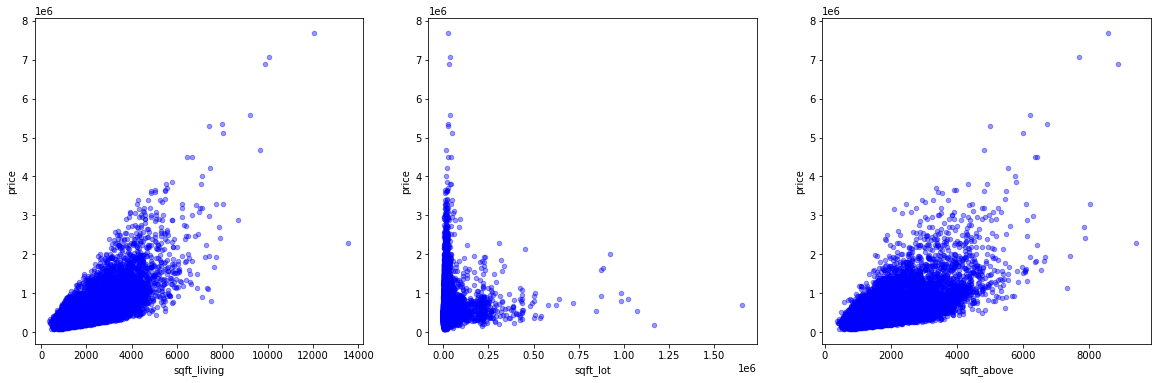

In [27]:
#Let's look at some of the data compared to our dependent variable, price.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

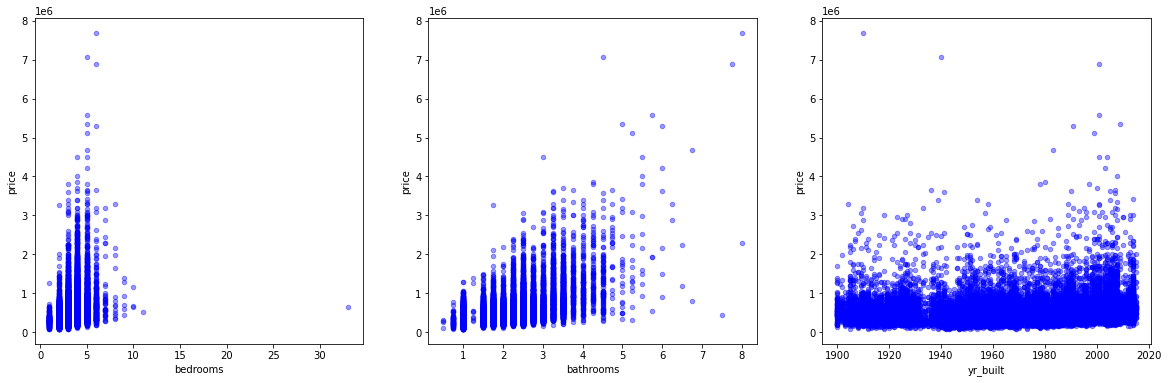

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'yr_built'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

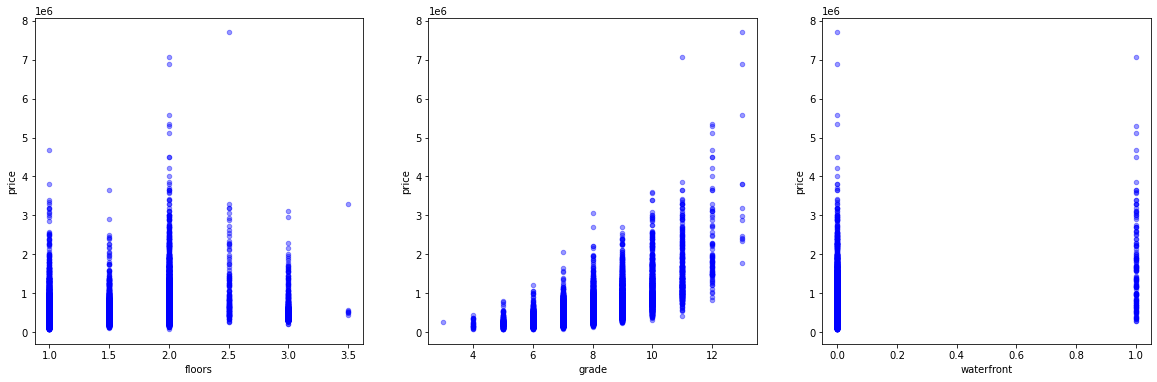

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['floors', 'grade', 'waterfront'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Above we can see that some of the categories above have an increasing variance as the value increases, while smaller values have a lower variance, thus we can see that there is some heteroscedasticity in our data. We will have to correct for this later by loging our variables or normalizing the data.

# Looking for Multicollinearity

Another condition we need to be looking out for is multicollinearity, a measure of the correlation between dependant variables. Idealy we will have little correlation. There will usualy be some level of multicollinearity in all models, however it is something to keep in mind and try to reduce whenever possible.

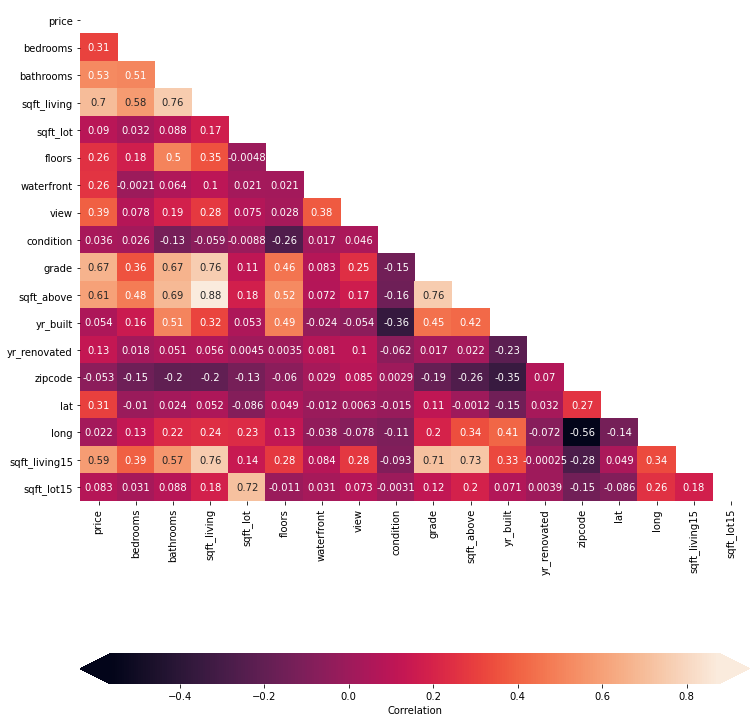

In [30]:
#We can check to see if there is a high level of correlation between values in our data by using a heatmap to find independent variables
#with a high level of correlation to one another. 
heatmap_data = data
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 14))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

We can see that there will be some Multicollinearity as some independent variables have a high level of correlation to one another, such as sqft_above and sqft_living (which would be the same for many entiries) and grade with sqft_living. 

# Drop unneeded columns

Let's remove a few of the variables that have too many missing values or will not be useful in our model

In [31]:
x_trial = data
unneeded = ['date', 'yr_renovated', 'sqft_basement']
y = data['price']
x_trial = x_trial.drop('price', axis=1)
x_trial = x_trial.drop(unneeded, axis=1)
x_trial = sm.add_constant(x_trial)

In [32]:
#make sure all the data is in a usable dtype (float or int)
x_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
dtypes: float64(6), int32(1), int64(10)
memory usage: 2

In [33]:
#build an inital model to see where we are starting from
model0 = sm.OLS(endog=y, exog=x_trial).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3140.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:36:17   Log-Likelihood:            -2.9441e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21580   BIC:                         5.890e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.678e+06   2.93e+06      2.622      0.009    1.94e+06    1.34e+07
bedrooms      -3.624e+04   1901.570    -19.058      0.000      -4e+04   -3.25e+04
bathrooms      4.386e+04   3242.297     13.527      0.000    3.75e+04    5.02e+04
sqft_living     149.6716      4.399     34.022      0.000     141.049     158.295
sqft_lot          0.1258      0.048      2.623      0.009       0.032       0.220
floors         7934.2693   3600.589      2.204      0.028     876.848     1.5e+04
waterfront      6.23e+05   1.81e+04     34.349      0.000    5.87e+05    6.59e+05
view           5.363e+04   2123.300     25.256      0.000    4.95e+04    5.78e+04
condition      2.462e+04   2320.160     10.610      0.000    2.01e+04    2.92e+04
grade           9.73e+04   2161.253     45.022      0.000    9.31e+04    1.02e+05
sqft_above       31.1056      4.363      7.129      0.000      22.554      39.657
yr_built      -2758.4653     68.984    -39.987      0.000   -2893.678   -2623.252
zipcode        -588.4926     33.015    -17.825      0.000    -653.204    -523.781
lat            5.985e+05   1.07e+04     55.729      0.000    5.77e+05     6.2e+05
long          -2.153e+05   1.32e+04    -16.363      0.000   -2.41e+05    -1.9e+05
sqft_living15    20.7858      3.450      6.025      0.000      14.023      27.548
sqft_lot15       -0.3855      0.073     -5.252      0.000      -0.529      -0.242
==============================================================================
Omnibus:                    18377.350   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1847895.306
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      47.749   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This looks like a good start. We have a R-squared value of 0.700, so we can attribute 70% of the home value to our independant variables. It also appears that all of our variabes are significant, as none have a p-value over 0.05.
We do have a high Omnibus value, which means we have some multicollinearity. Our skew and kurtosis are also not ideal and show that the data is not currently eavenly distributed...
____
____
____

In [34]:
#lets make a dataframe with our variables that we can change and as we porceed. 
prelim_X = x_trial
prelim_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  float64
 10  sqft_above     21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
dtypes: float64(6), int32(1), int64(10)
memory usage: 2

C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\misc.py:95: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


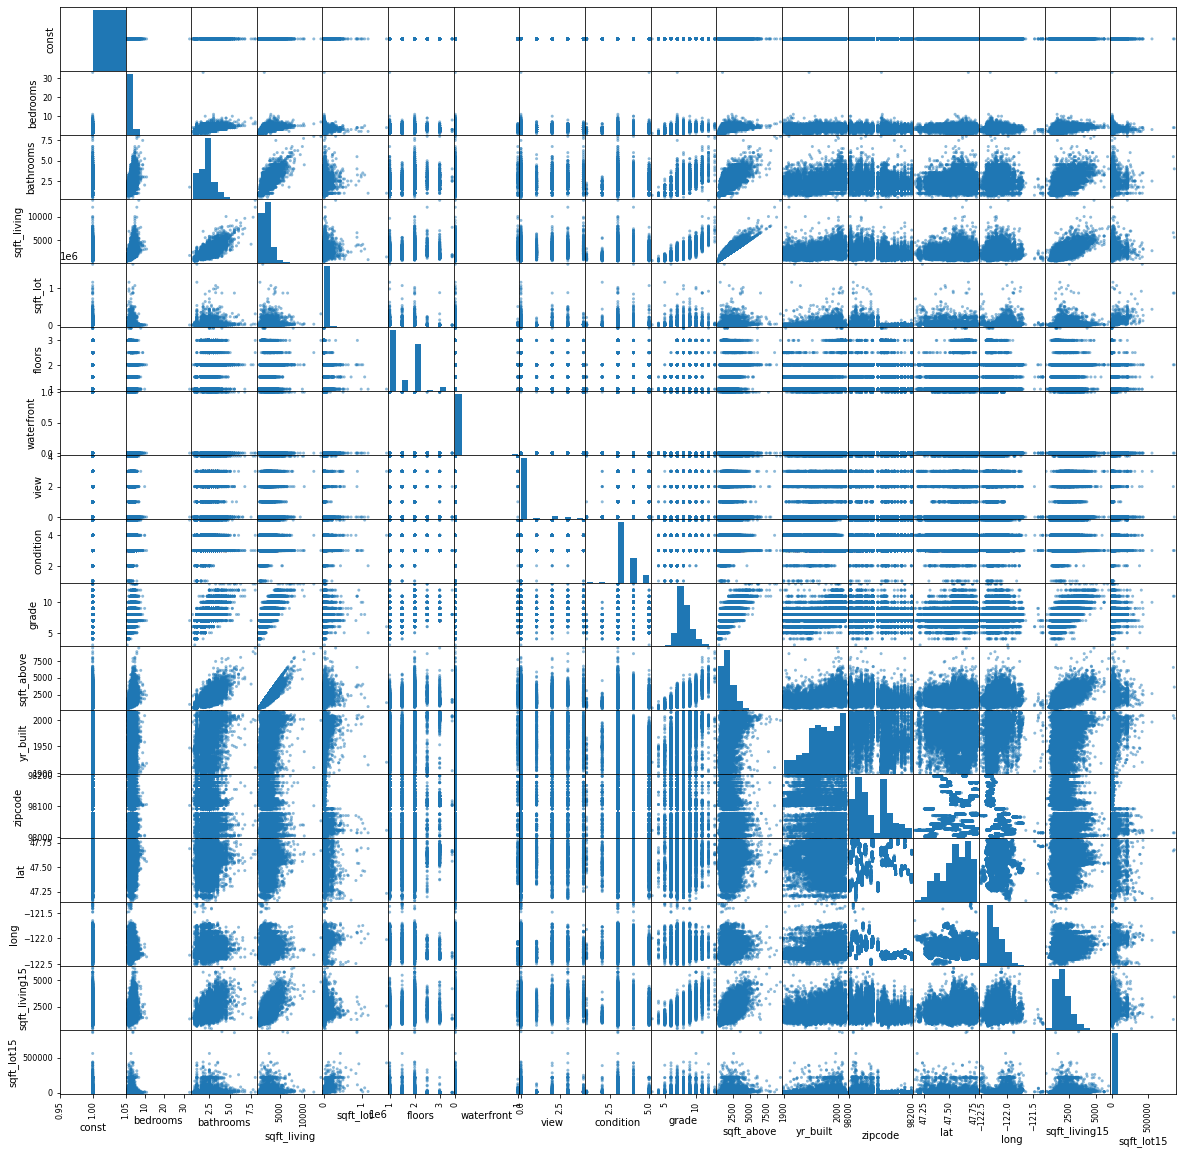

In [35]:
pd.plotting.scatter_matrix(prelim_X, figsize=(20,20));

In the above matrix, we can see the price relative to the independant variables in the top row. For many of the variables the distribution increases as the price increases, showing heteroscedasticity.

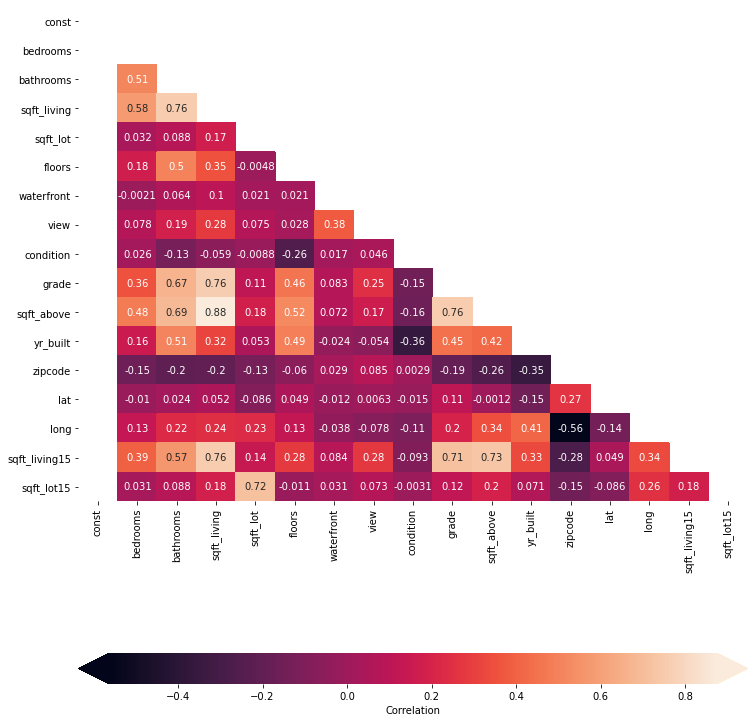

In [36]:
#We can check to see if there is a high level of correlation between values in our data by using a heatmap to find independent variables
#with a high level of correlation to one another. 
heatmap_data = prelim_X
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 14))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

Looking at our above heatmap we can see that some variables have a high level of correlation to other values. To reduce heteroscedasticity, we can drop a few of these variables. Sqft_living15 (the house square footage of the 15 nearest neighbors) and sqft_lot15 (the lot square footage of the 15 nearest neighbors) both have a high correlation to the square footage of the house and lot for sale. This is likely due to most homes in a neighborhood being build to a similar specification with similar lots. 
sqft_above (square footage above ground) has a very high correlation with the sqft_living, and would be best to drop from our model. Because most homes do not have basements (and fewer would have finished basements), these numbers will mostly be the same and not contribute much to our model while including both.
Grade also has a high correlation with sqft_living, however, they both have storng correlations to our dependant variable and we will keep both for now. 
To recap, we will drop sqft_living15, sqft_lot15, sqft_above

In [37]:
# lets remove some of the columns that do not perform well
# or have a high chance of multicolliearity, such as sqft_above(correlates with sqft_living.)

unneeded = ['sqft_above', 'sqft_living15', 'sqft_lot15', 'date', 'yr_renovated', 'sqft_basement']

In [38]:
prelim_X = data.drop(unneeded, axis=1)

X = prelim_X.drop('price', axis=1)
X = sm.add_constant(X)
y = prelim_X['price']

In [39]:
prelim_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  int32  
 7   view         21597 non-null  int64  
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  float64
 10  yr_built     21597 non-null  int64  
 11  zipcode      21597 non-null  int64  
 12  lat          21597 non-null  float64
 13  long         21597 non-null  float64
dtypes: float64(6), int32(1), int64(7)
memory usage: 2.2 MB


In [40]:
model = sm.OLS(endog=y, exog=X).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     3833.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:37:22   Log-Likelihood:            -2.9447e+05
No. Observations:               21597   AIC:                         5.890e+05
Df Residuals:                   21583   BIC:                         5.891e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.402e+07   2.84e+06      4.931      0.000    8.45e+06    1.96e+07
bedrooms    -3.609e+04   1904.669    -18.948      0.000   -3.98e+04   -3.24e+04
bathrooms    3.932e+04   3203.303     12.273      0.000     3.3e+04    4.56e+04
sqft_living   177.8425      3.105     57.270      0.000     171.756     183.929
sqft_lot       -0.0416      0.035     -1.195      0.232      -0.110       0.027
floors        1.85e+04   3229.870      5.728      0.000    1.22e+04    2.48e+04
waterfront   6.219e+05   1.82e+04     34.227      0.000    5.86e+05    6.58e+05
view         5.316e+04   2081.303     25.541      0.000    4.91e+04    5.72e+04
condition    2.247e+04   2316.939      9.697      0.000    1.79e+04     2.7e+04
grade        1.043e+05   2038.008     51.186      0.000       1e+05    1.08e+05
yr_built    -2774.6588     69.162    -40.118      0.000   -2910.221   -2639.096
zipcode      -617.0962     32.943    -18.732      0.000    -681.667    -552.526
lat          5.937e+05   1.07e+04     55.547      0.000    5.73e+05    6.15e+05
long        -1.884e+05   1.27e+04    -14.810      0.000   -2.13e+05   -1.63e+05
==============================================================================
Omnibus:                    18243.311   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1780912.108
Skew:                           3.538   Prob(JB):                         0.00
Kurtosis:                      46.920   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
prelim_X = prelim_X.drop('sqft_lot', axis=1)

X = prelim_X.drop('price', axis=1)
X = sm.add_constant(X)
y = prelim_X['price']

In [43]:
model = sm.OLS(endog=y, exog =X).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     4152.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:37:23   Log-Likelihood:            -2.9447e+05
No. Observations:               21597   AIC:                         5.890e+05
Df Residuals:                   21584   BIC:                         5.891e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.367e+07   2.83e+06      4.834      0.000    8.13e+06    1.92e+07
bedrooms    -3.591e+04   1898.551    -18.913      0.000   -3.96e+04   -3.22e+04
bathrooms     3.94e+04   3202.565     12.302      0.000    3.31e+04    4.57e+04
sqft_living   177.3970      3.083     57.541      0.000     171.354     183.440
floors       1.865e+04   3227.350      5.780      0.000    1.23e+04     2.5e+04
waterfront   6.221e+05   1.82e+04     34.240      0.000    5.87e+05    6.58e+05
view         5.306e+04   2079.830     25.514      0.000     4.9e+04    5.71e+04
condition     2.25e+04   2316.790      9.713      0.000     1.8e+04     2.7e+04
grade        1.043e+05   2038.028     51.185      0.000       1e+05    1.08e+05
yr_built    -2770.7010     69.083    -40.107      0.000   -2906.110   -2635.292
zipcode      -617.5825     32.941    -18.748      0.000    -682.149    -553.016
lat          5.947e+05   1.07e+04     55.807      0.000    5.74e+05    6.16e+05
long        -1.912e+05   1.25e+04    -15.286      0.000   -2.16e+05   -1.67e+05
==============================================================================
Omnibus:                    18255.676   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1787451.250
Skew:                           3.541   Prob(JB):                         0.00
Kurtosis:                      47.002   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#find the residual values from the model. The diffrence between the price and the predicted price. 
residuals = model.resid
residuals

0         13839.144605
1       -164978.790728
2       -170738.325712
3        139732.708736
4         71690.085747
             ...      
21592   -136449.389066
21593    -30749.784603
21594    248825.402605
21595       -42.437130
21596    169132.107041
Length: 21597, dtype: float64

In [46]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [47]:
y_pred = model.fittedvalues
y_pred

0        208060.855395
1        702978.790728
2        350738.325712
3        464267.291264
4        438309.914253
             ...      
21592    496449.389066
21593    430749.784603
21594    153275.597395
21595    400042.437130
21596    155867.892959
Length: 21597, dtype: float64

In [48]:
#standard error for all coefficients in the model
model.bse

const          2.828522e+06
bedrooms       1.898551e+03
bathrooms      3.202565e+03
sqft_living    3.082948e+00
floors         3.227350e+03
waterfront     1.816947e+04
view           2.079830e+03
condition      2.316790e+03
grade          2.038028e+03
yr_built       6.908340e+01
zipcode        3.294074e+01
lat            1.065605e+04
long           1.250630e+04
dtype: float64

In [49]:
#taking the known sale price (y) and supraticting the predicted y for each entry, we can find a mean absolute error of the model.
mae_resid = np.mean(np.abs(y-y_pred))
mae_resid

126318.15785973587

In [50]:
'''Currently the mean error of our predictions is $126,318. This is fairly high.'''

'Currently the mean error of our predictions is $126,318. This is fairly high.'

## MSE

In [51]:
mse_resid = model.mse_resid
mse_resid

40812810191.651535

In [52]:
rmse_resdiuals = np.sqrt(model.mse_resid)
rmse_resdiuals

202021.80622806918

Because our root mean sqared error is larger than our mean absolute error,
we can assume there are still outliers in our data set.

## T-test

T-test can show the significance of a coefficent. The closer a coefficent is to zero, the less significant it will be. Negative numbers have an inverse relationship with the variable. 

In [53]:
model.tvalues

const           4.834161
bedrooms      -18.912544
bathrooms      12.302424
sqft_living    57.541343
floors          5.780125
waterfront     34.240253
view           25.513521
condition       9.712610
grade          51.184703
yr_built      -40.106609
zipcode       -18.748291
lat            55.807252
long          -15.286431
dtype: float64

All of our t-values look good with none being too close to zero.

In [54]:
model.pvalues

const           1.346278e-06
bedrooms        3.925791e-79
bathrooms       1.148608e-34
sqft_living     0.000000e+00
floors          7.567311e-09
waterfront     2.949613e-250
view           1.740681e-141
condition       2.959063e-22
grade           0.000000e+00
yr_built        0.000000e+00
zipcode         8.301806e-78
lat             0.000000e+00
long            1.774013e-52
dtype: float64

All the p-values are below 0.05 so we can reject the null hypothesis, that there is no significant correlation between our independant and dependant variables. 

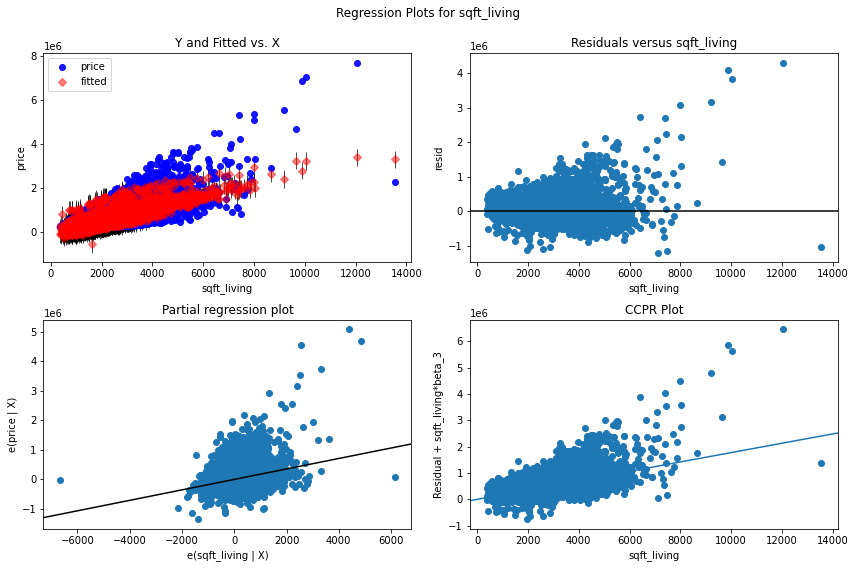

In [55]:
#might remove
reg_fig = plt.figure(figsize=(12,8))
reg_fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=reg_fig)

# Linear Regession

In a linear regression model, it is important to keep a few rules in mind. We need to make sure that we have homoskedasticity, that the data is normal (and not skewed), and check for multicollinearity, that our independent variables are not too strongly correlated with each other. 

We can visualize these conditions by looking at some graphs of our variables. In the graphs below, we can see in the top row the distribution of our independent variables to the dependent variable of price. What we would like to see is a similar distribution of data points across a graph and following a linear pattern. In many of the variables below we do see more of a cone pattern, where the variance between values increases as the independent variable increases. This is a sign of heteroscedasticity, which is not ideal for our model. 

We can also see the diagonal graphs where the values meet themselves to see if our values have a normal distribution. What we would like to see is a bell curve with minimal to no skew. Some of our variables look pretty good, with a fairly strong bell curve, however many have non-normal distribution. We can help reduce this condition by normalizing our data. 

Lastly we can look at other graphs across the set of graphs below and look for strong correlation between our values to find multicollinearity. Although there will likely be some correlation between values, we want to make sure that we do not have multiple values that are closely related or are mostly measuring the same thing. We saw this some earlier between sqft_living and sqft_above and have taken some steps to reduce multicollinearity, however it is still good to keep an eye out for any other values that we might need to work with. 



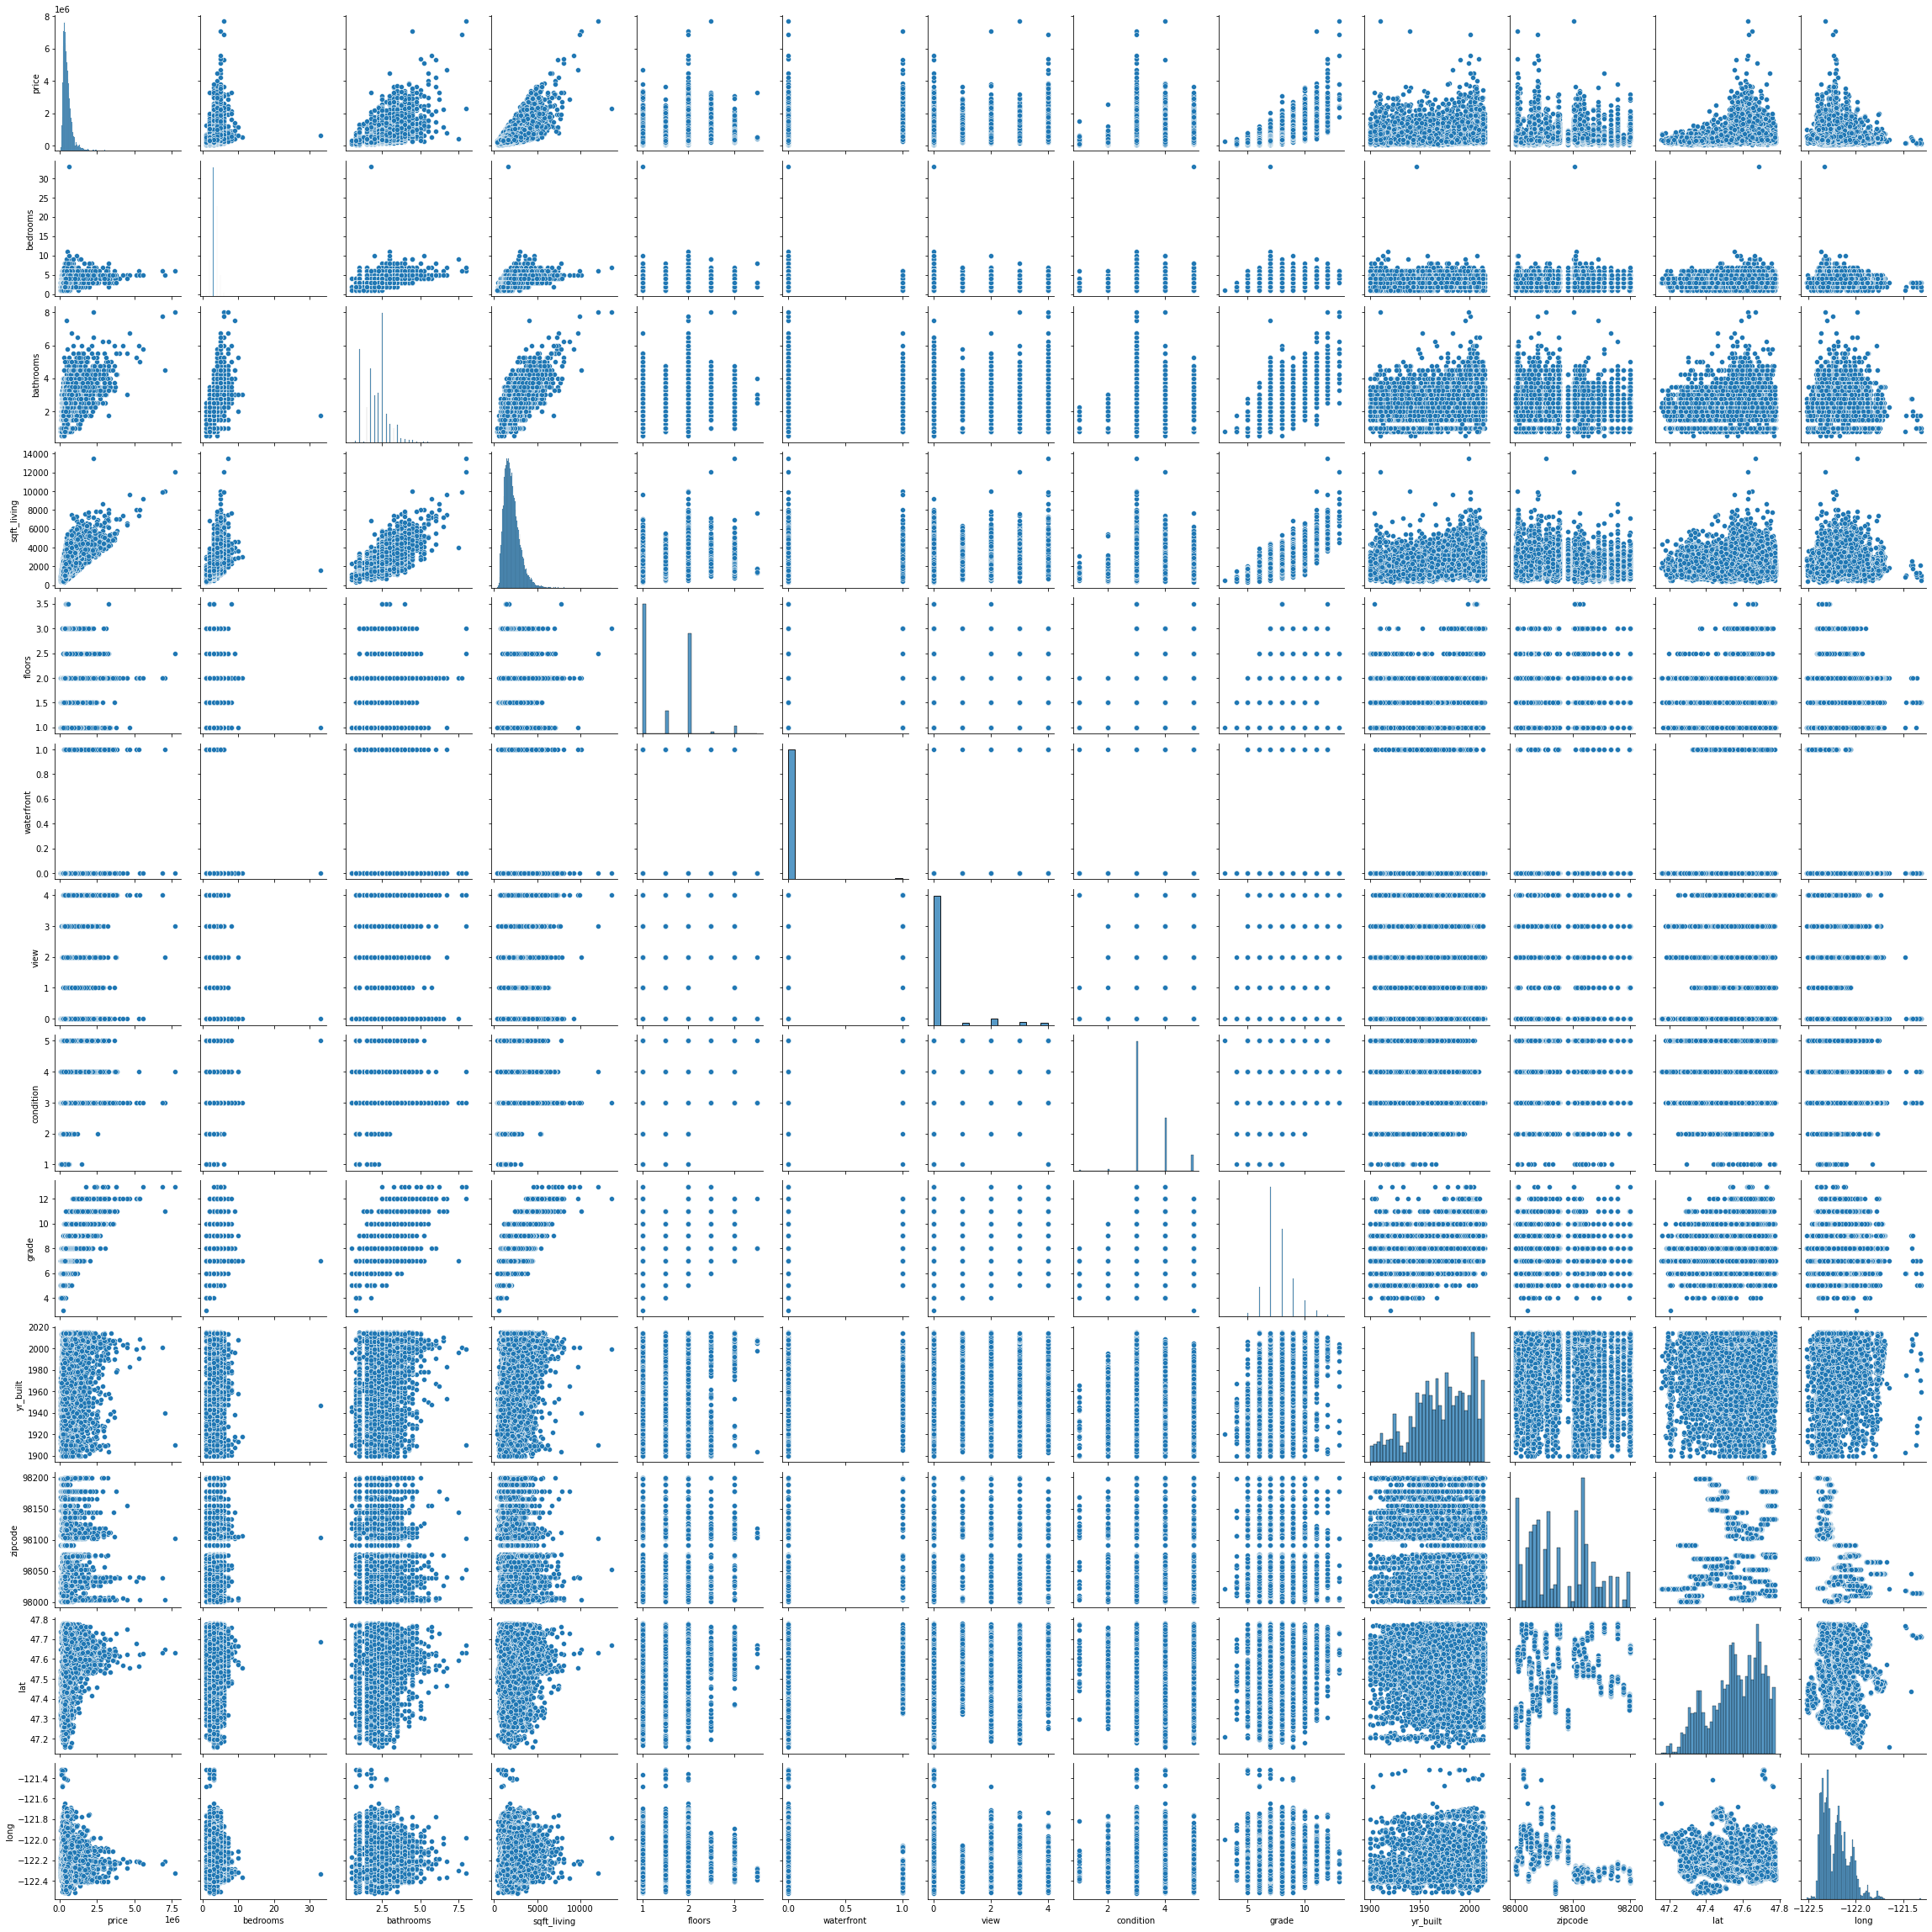

In [56]:
sns.pairplot(prelim_X);

C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


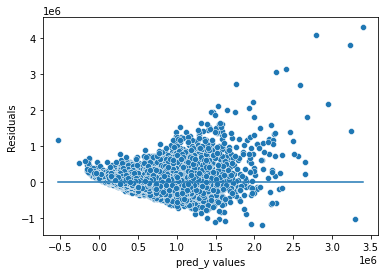

In [57]:
p = sns.scatterplot(y_pred, residuals)
plt.xlabel('pred_y values')
plt.ylabel('Residuals')
p = sns.lineplot([y_pred.min(), y_pred.max()], [0,0])

There is a increasing variance in the residuals as the pred_y values increase. Thus we can assume Heteroscedasticity 

In [58]:
from scipy import stats

In [59]:
mu, std = stats.norm.fit(residuals)
mu, std

(2.77059483474044e-06, 201960.9950317632)

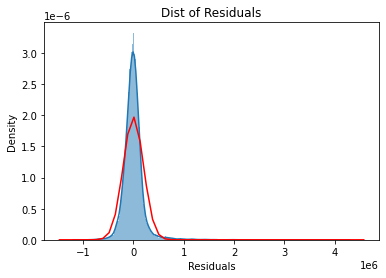

In [60]:
fig,ax = plt.subplots()
sns.histplot(x=residuals, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title='Dist of Residuals', xlabel= 'Residuals')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = stats.norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color='red', ax=ax);

We can see our distribution of our residuals above. We have a more centralized distribution than a typical normal bell curve, which many many of our predicted values are close to our actual price values. We can also see that we have some ouliers on the tails of our curve where they go above the normal distribution

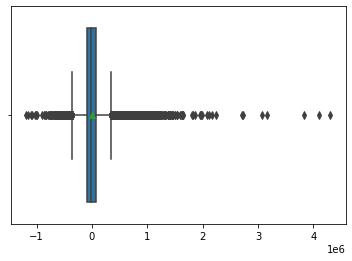

In [61]:
sns.boxplot(x = residuals, showmeans=True);

In the boxplot above we can see that we have many outliers, confirming what we were seeing in our above distribution. 

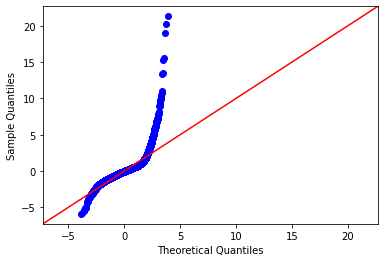

In [62]:
#q-q plot
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

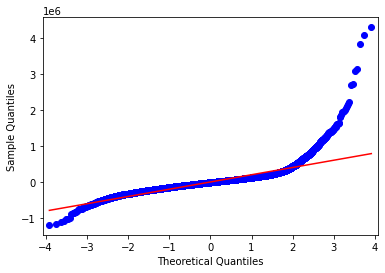

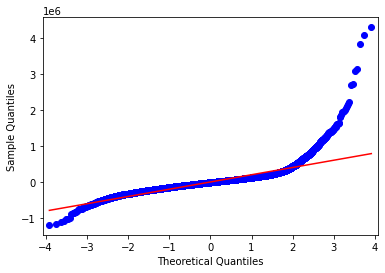

In [63]:
sm.qqplot(residuals, line = 's')

Looking at the above qq plot we can see that most of are values follow a fairly good distribution but we have a a small tail or outliers on the lower end of our distribution and a larger, more significant seperation from normality. We can help solve this by removing some outliers.

## Drop outliers

C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


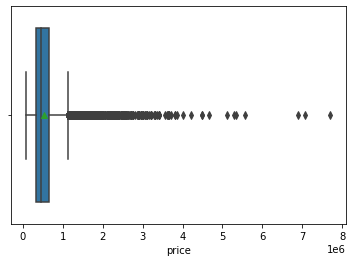

In [64]:
sns.boxplot(prelim_X['price'], showmeans=True);

In [65]:
# IQR
q1 = np.percentile(prelim_X['price'], 25, interpolation = 'midpoint')
q3 = np.percentile(prelim_X['price'], 75, interpolation = 'midpoint')
IQR = q3 - q1
 
# Upper bound
q3_roof = q3 + (1.2 * IQR)
# Lower bound
q1_floor = q1 - (1.2 * IQR)

print(IQR)
print(q1_floor)
print(q3_roof)

323000.0
-65600.0
1032600.0


In [66]:
prelim_X.drop(prelim_X.loc[(prelim_X['price'] < q1_floor) | (prelim_X['price'] > q3_roof)].index, inplace=True)

C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


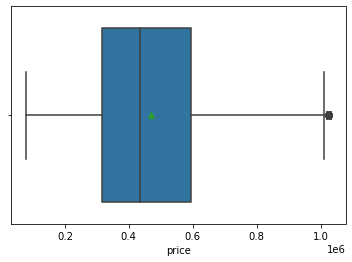

In [67]:
sns.boxplot(prelim_X['price'], showmeans=True);

In [68]:
X = prelim_X.drop('price', axis=1)
X = sm.add_constant(X)
y = prelim_X['price']

In [69]:
model2 = sm.OLS(endog=y, exog=X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3612.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:38:41   Log-Likelihood:            -2.6360e+05
No. Observations:               20206   AIC:                         5.272e+05
Df Residuals:                   20193   BIC:                         5.273e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.641e+06   1.62e+06      1.627      0.104   -5.41e+05    5.82e+06
bedrooms    -1.014e+04   1114.492     -9.094      0.000   -1.23e+04   -7950.989
bathrooms     2.15e+04   1890.966     11.371      0.000    1.78e+04    2.52e+04
sqft_living    89.2347      1.938     46.055      0.000      85.437      93.032
floors       3.059e+04   1874.872     16.316      0.000    2.69e+04    3.43e+04
waterfront   1.434e+05   1.66e+04      8.655      0.000    1.11e+05    1.76e+05
view          3.25e+04   1367.339     23.771      0.000    2.98e+04    3.52e+04
condition    2.227e+04   1335.251     16.680      0.000    1.97e+04    2.49e+04
grade        7.934e+04   1222.711     64.888      0.000    7.69e+04    8.17e+04
yr_built    -1852.1004     40.881    -45.304      0.000   -1932.231   -1771.970
zipcode      -258.2777     18.952    -13.628      0.000    -295.425    -221.131
lat          5.412e+05   5990.331     90.342      0.000    5.29e+05    5.53e+05
long        -1358.5644   7123.609     -0.191      0.849   -1.53e+04    1.26e+04
==============================================================================
Omnibus:                     1317.089   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2178.695
Skew:                           0.515   Prob(JB):                         0.00
Kurtosis:                       4.236   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that longitude has become an insignificant value and should be removed.

In [70]:
prelim_X = prelim_X.drop('long', axis=1)
X = prelim_X.drop('price', axis=1)
X = sm.add_constant(X)
y = prelim_X['price']

In [71]:
model2 = sm.OLS(endog=y, exog=X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3941.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:38:41   Log-Likelihood:            -2.6360e+05
No. Observations:               20206   AIC:                         5.272e+05
Df Residuals:                   20194   BIC:                         5.273e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.647e+06   1.62e+06      1.631      0.103   -5.35e+05    5.83e+06
bedrooms    -1.013e+04   1113.212     -9.096      0.000   -1.23e+04   -7943.422
bathrooms    2.153e+04   1886.565     11.410      0.000    1.78e+04    2.52e+04
sqft_living    89.1670      1.905     46.812      0.000      85.434      92.901
floors        3.06e+04   1873.463     16.336      0.000    2.69e+04    3.43e+04
waterfront   1.435e+05   1.66e+04      8.663      0.000    1.11e+05    1.76e+05
view         3.251e+04   1366.774     23.786      0.000    2.98e+04    3.52e+04
condition    2.228e+04   1334.802     16.690      0.000    1.97e+04    2.49e+04
grade        7.936e+04   1219.064     65.097      0.000     7.7e+04    8.17e+04
yr_built    -1853.9186     39.753    -46.636      0.000   -1931.838   -1775.999
zipcode      -256.5777     16.724    -15.342      0.000    -289.358    -223.797
lat          5.411e+05   5982.036     90.457      0.000    5.29e+05    5.53e+05
==============================================================================
Omnibus:                     1319.480   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2183.617
Skew:                           0.516   Prob(JB):                         0.00
Kurtosis:                       4.237   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     4152.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:38:41   Log-Likelihood:            -2.9447e+05
No. Observations:               21597   AIC:                         5.890e+05
Df Residuals:                   21584   BIC:                         5.891e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.367e+07   2.83e+06      4.834      0.000    8.13e+06    1.92e+07
bedrooms    -3.591e+04   1898.551    -18.913      0.000   -3.96e+04   -3.22e+04
bathrooms     3.94e+04   3202.565     12.302      0.000    3.31e+04    4.57e+04
sqft_living   177.3970      3.083     57.541      0.000     171.354     183.440
floors       1.865e+04   3227.350      5.780      0.000    1.23e+04     2.5e+04
waterfront   6.221e+05   1.82e+04     34.240      0.000    5.87e+05    6.58e+05
view         5.306e+04   2079.830     25.514      0.000     4.9e+04    5.71e+04
condition     2.25e+04   2316.790      9.713      0.000     1.8e+04     2.7e+04
grade        1.043e+05   2038.028     51.185      0.000       1e+05    1.08e+05
yr_built    -2770.7010     69.083    -40.107      0.000   -2906.110   -2635.292
zipcode      -617.5825     32.941    -18.748      0.000    -682.149    -553.016
lat          5.947e+05   1.07e+04     55.807      0.000    5.74e+05    6.16e+05
long        -1.912e+05   1.25e+04    -15.286      0.000   -2.16e+05   -1.67e+05
==============================================================================
Omnibus:                    18255.676   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1787451.250
Skew:                           3.541   Prob(JB):                         0.00
Kurtosis:                      47.002   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After removing more outliers, we lost a small amount (~ 0.016) for our R-squared value. We did see a large reduction in the Omnibus, skew, kurtosis, and Jarque-Bera. This results points towards a more normal distribution of our data. 

### ~~~~

In [73]:
#find the residual values fromthe model
residuals2 = model2.resid
residuals2

0        -68914.055499
1        -68808.454900
2       -206968.000302
3        168721.836061
4         49218.655675
             ...      
21592   -155792.645915
21593    -22256.263816
21594    136572.643918
21595    -31023.603339
21596     57780.060585
Length: 20206, dtype: float64

In [74]:
y_pred2 = model2.fittedvalues
y_pred2

0        290814.055499
1        606808.454900
2        386968.000302
3        435278.163939
4        460781.344325
             ...      
21592    515792.645915
21593    422256.263816
21594    265528.356082
21595    431023.603339
21596    267219.939415
Length: 20206, dtype: float64

In [75]:
#standard error for all coefficients in the model
model2.bse

const          1.623465e+06
bedrooms       1.113212e+03
bathrooms      1.886565e+03
sqft_living    1.904786e+00
floors         1.873463e+03
waterfront     1.656462e+04
view           1.366774e+03
condition      1.334802e+03
grade          1.219064e+03
yr_built       3.975335e+01
zipcode        1.672417e+01
lat            5.982036e+03
dtype: float64

In [76]:
#taking the known sale price (y) and supraticting the predicted y for each entry, we can find a mean absolute error of the model.
mae_resid2 = np.mean(np.abs(y-y_pred2))
mae_resid2

85419.89905546383

In our earlier model, we had a mean absolute error of 126,166. In our current model that has reduced to $85,419. We have greatly reduced our mean absolute error and are on a good track to a more accurate model. 

C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


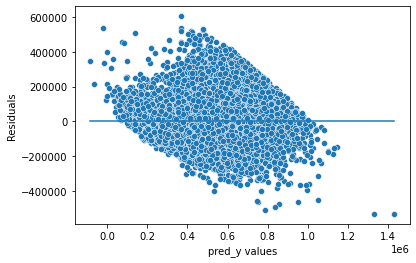

In [77]:
p = sns.scatterplot(y_pred2, residuals2)
plt.xlabel('pred_y values')
plt.ylabel('Residuals')
p = sns.lineplot([y_pred2.min(), y_pred2.max()], [0,0])

### ~~~~

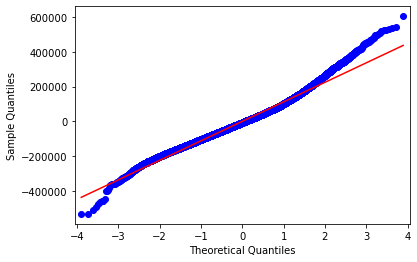

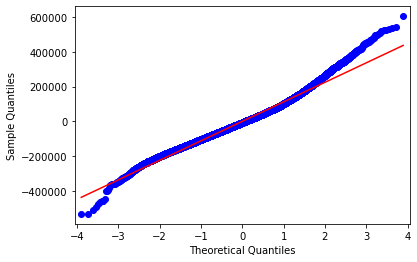

In [78]:
sm.qqplot(residuals2, line = 's')

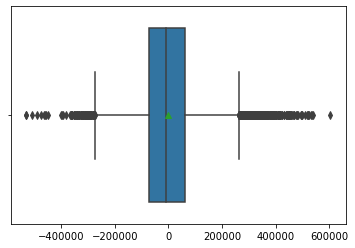

In [79]:
sns.boxplot(x = residuals2, showmeans=True);

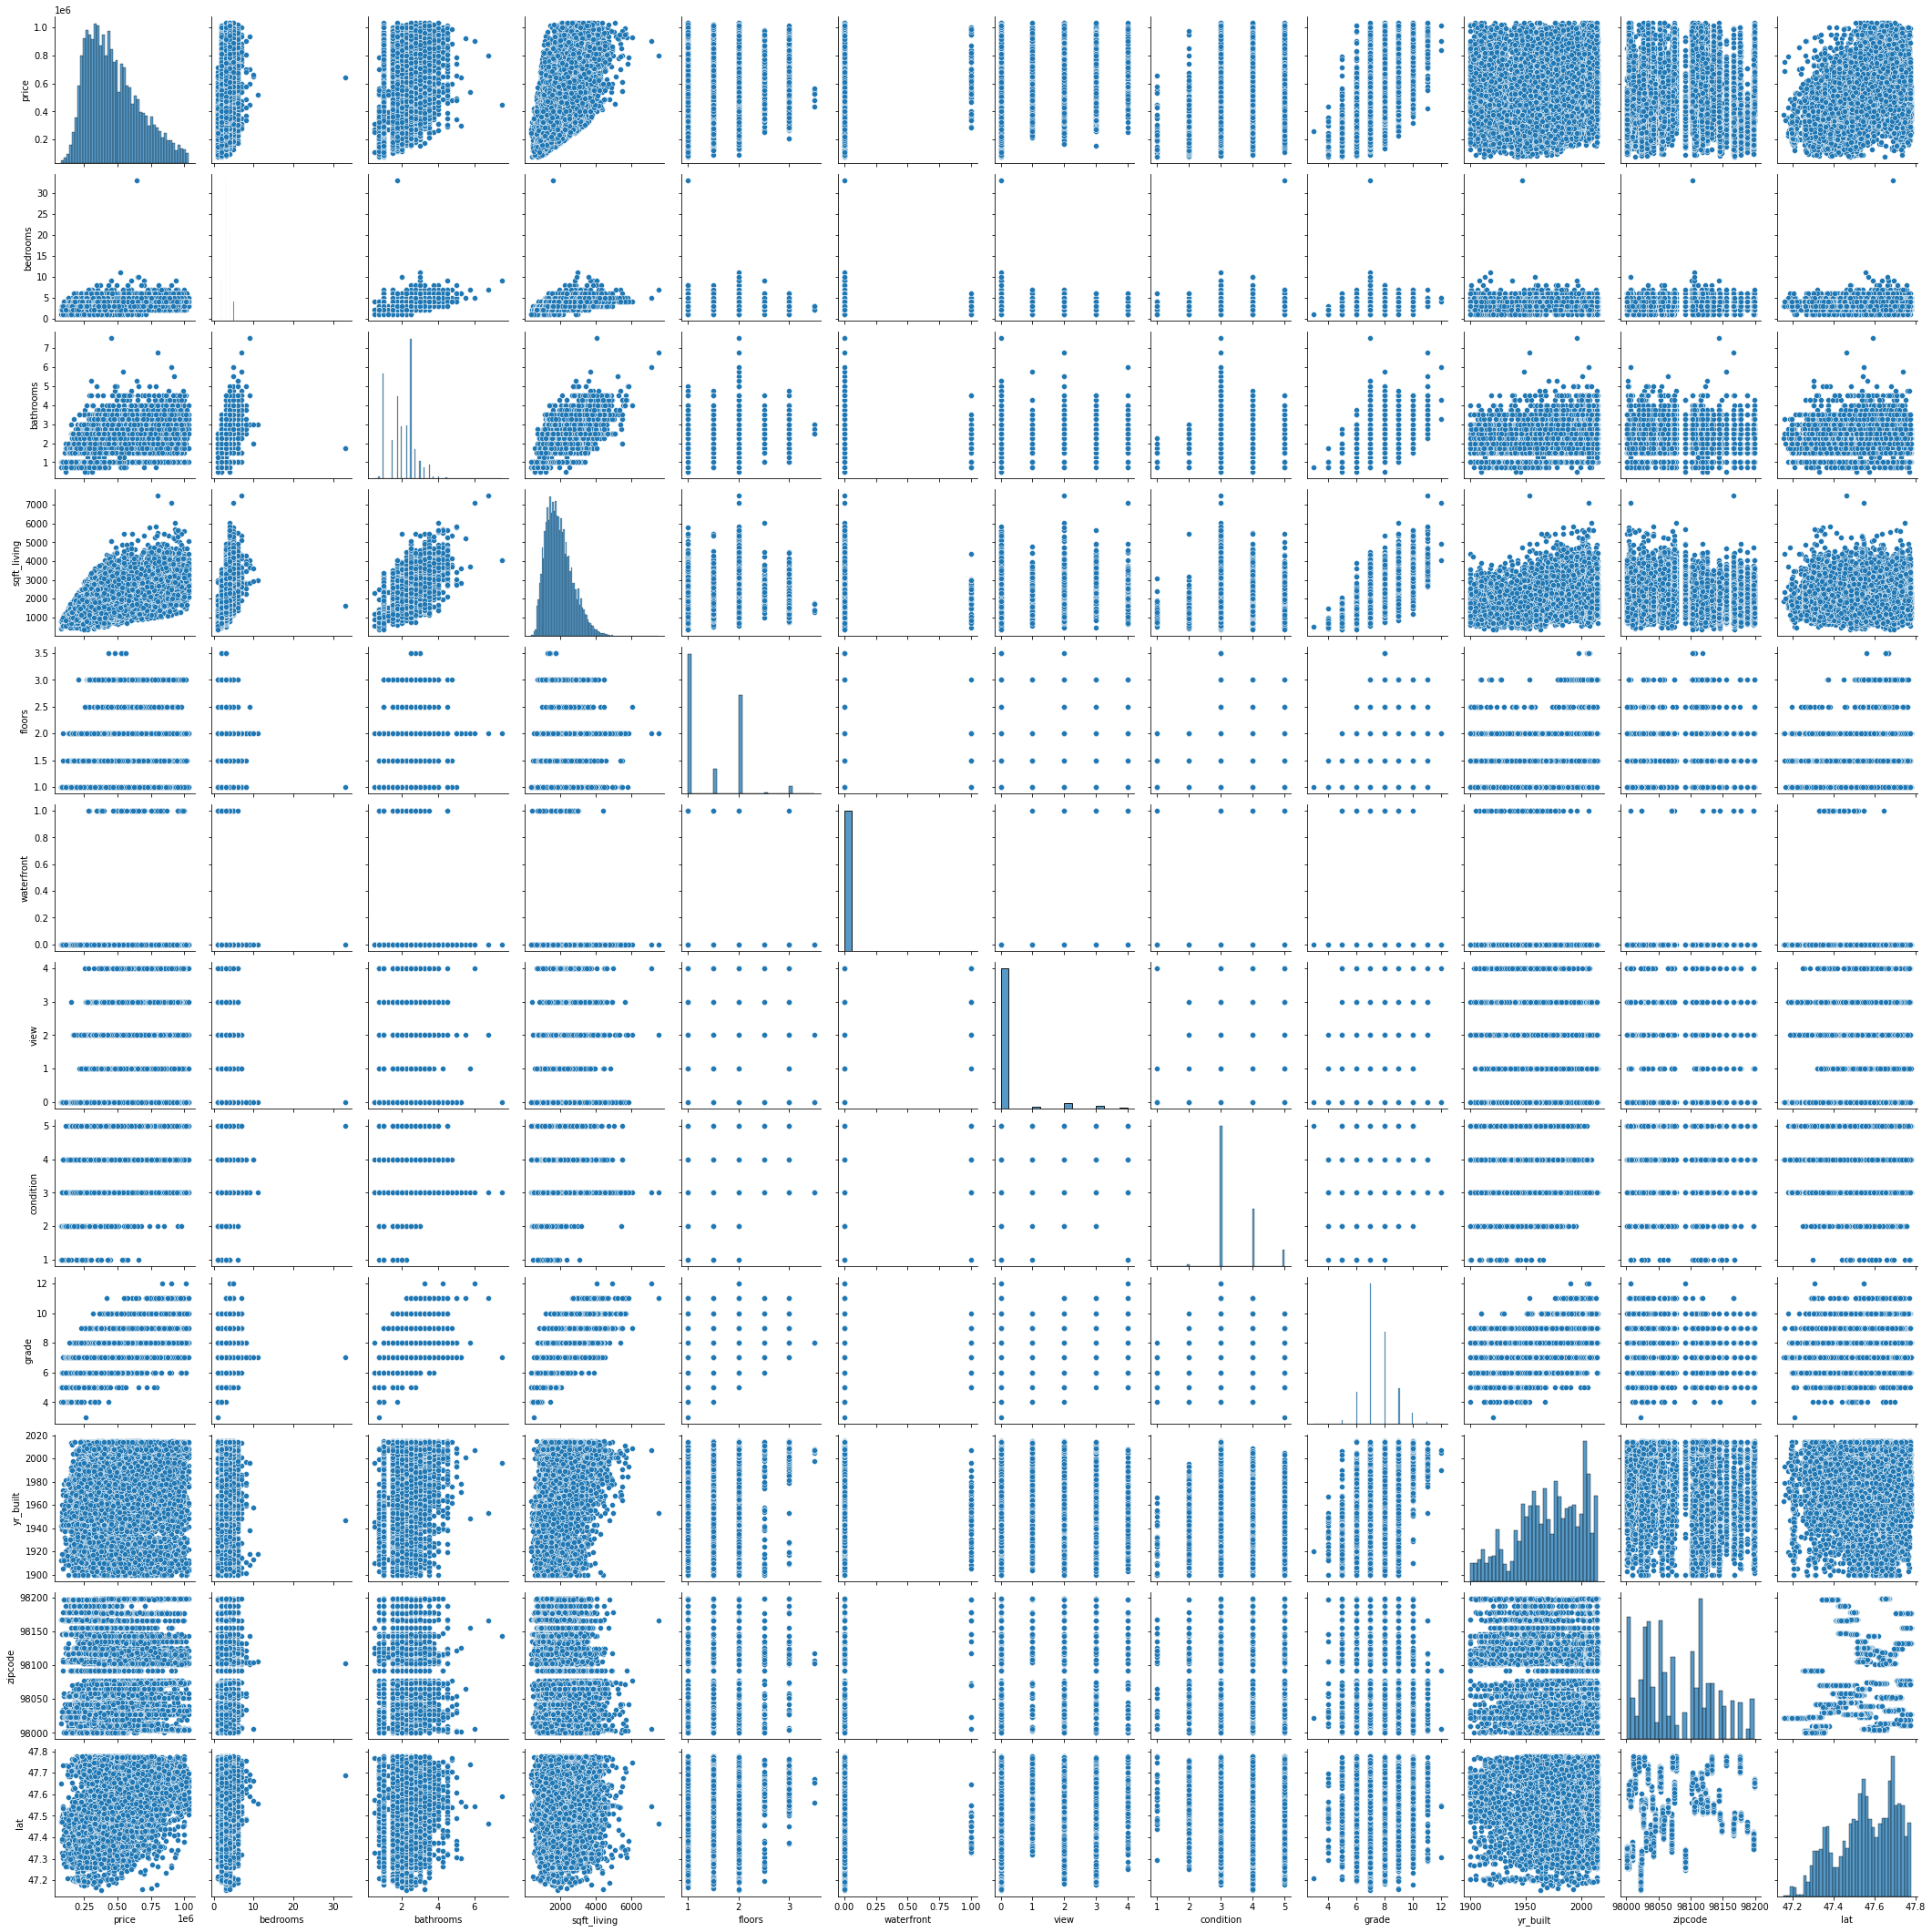

In [80]:
sns.pairplot(prelim_X);

In [81]:
#not_normal = ['price']

#for feature in not_normal:
    #prelim_X[feature] = prelim_X[feature].map(lambda x: np.log(x))

In [82]:
#sns.pairplot(prelim_X);

In [83]:
#X = prelim_X.drop('price', axis=1)
#X = sm.add_constant(X)
#y = prelim_X['price']

#model3 = sm.OLS(y, X).fit()
#model3.summary()

## Log of dependent variable

In [84]:
# get the log of the home prices
y_log = np.log(y)
y_log

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price, Length: 20206, dtype: float64

In [85]:
model3 = sm.OLS(endog=y_log, exog=X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4145.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:39:41   Log-Likelihood:                -7.4549
No. Observations:               20206   AIC:                             38.91
Df Residuals:                   20194   BIC:                             133.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.6820      3.508      1.620      0.105      -1.194      12.558
bedrooms       -0.0150      0.002     -6.252      0.000      -0.020      -0.010
bathrooms       0.0637      0.004     15.636      0.000       0.056       0.072
sqft_living     0.0002   4.12e-06     42.306      0.000       0.000       0.000
floors          0.0678      0.004     16.752      0.000       0.060       0.076
waterfront      0.3150      0.036      8.800      0.000       0.245       0.385
view            0.0664      0.003     22.468      0.000       0.061       0.072
condition       0.0558      0.003     19.360      0.000       0.050       0.061
grade           0.1629      0.003     61.841      0.000       0.158       0.168
yr_built       -0.0034   8.59e-05    -39.673      0.000      -0.004      -0.003
zipcode        -0.0005   3.61e-05    -14.948      0.000      -0.001      -0.000
lat             1.3676      0.013    105.800      0.000       1.342       1.393
==============================================================================
Omnibus:                      396.145   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.720
Skew:                          -0.132   Prob(JB):                    1.43e-161
Kurtosis:                       3.900   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Omnibus is greatly reduced, thus the model should be more homoskedastic.

In [86]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3941.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:39:41   Log-Likelihood:            -2.6360e+05
No. Observations:               20206   AIC:                         5.272e+05
Df Residuals:                   20194   BIC:                         5.273e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.647e+06   1.62e+06      1.631      0.103   -5.35e+05    5.83e+06
bedrooms    -1.013e+04   1113.212     -9.096      0.000   -1.23e+04   -7943.422
bathrooms    2.153e+04   1886.565     11.410      0.000    1.78e+04    2.52e+04
sqft_living    89.1670      1.905     46.812      0.000      85.434      92.901
floors        3.06e+04   1873.463     16.336      0.000    2.69e+04    3.43e+04
waterfront   1.435e+05   1.66e+04      8.663      0.000    1.11e+05    1.76e+05
view         3.251e+04   1366.774     23.786      0.000    2.98e+04    3.52e+04
condition    2.228e+04   1334.802     16.690      0.000    1.97e+04    2.49e+04
grade        7.936e+04   1219.064     65.097      0.000     7.7e+04    8.17e+04
yr_built    -1853.9186     39.753    -46.636      0.000   -1931.838   -1775.999
zipcode      -256.5777     16.724    -15.342      0.000    -289.358    -223.797
lat          5.411e+05   5982.036     90.457      0.000    5.29e+05    5.53e+05
==============================================================================
Omnibus:                     1319.480   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2183.617
Skew:                           0.516   Prob(JB):                         0.00
Kurtosis:                       4.237   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#find the residual values fromthe model
residuals3 = model3.resid
residuals3

0       -0.250120
1       -0.083185
2       -0.706163
3        0.389555
4        0.176823
           ...   
21592   -0.335048
21593    0.015535
21594    0.357178
21595   -0.006781
21596    0.141302
Length: 20206, dtype: float64

C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grant\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


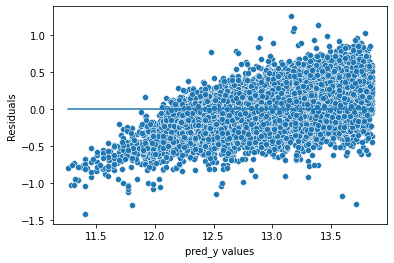

In [88]:
p = sns.scatterplot(y_log, residuals3)
plt.xlabel('pred_y values')
plt.ylabel('Residuals')
p = sns.lineplot([y_log.min(), y_log.max()], [0,0])

In [89]:
y_pred3 = model3.fittedvalues
y_pred3

0        12.560103
1        13.278799
2        12.806876
3        12.921774
4        12.965343
           ...    
21592    13.128907
21593    12.883685
21594    12.547281
21595    12.906001
21596    12.550279
Length: 20206, dtype: float64

In [90]:
#standard error for all coefficients in the model
model3.bse

const          3.507935
bedrooms       0.002405
bathrooms      0.004076
sqft_living    0.000004
floors         0.004048
waterfront     0.035792
view           0.002953
condition      0.002884
grade          0.002634
yr_built       0.000086
zipcode        0.000036
lat            0.012926
dtype: float64

In [91]:
#taking the known sale price (y) and supraticting the predicted y for each entry, we can find a mean absolute error of the model.
mae_resid3 = np.mean(np.abs(y_log-y_pred3))
mae_resid3

0.18795085393166783

## Normalized

## Standardization

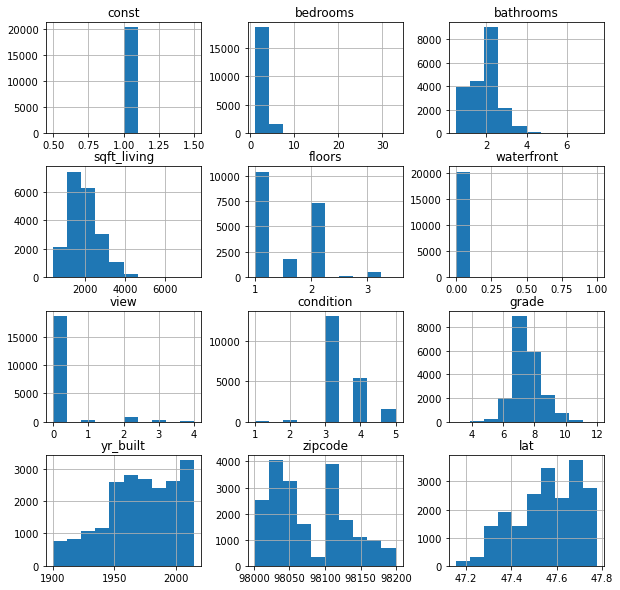

In [92]:
X.hist(figsize = [10,10]);

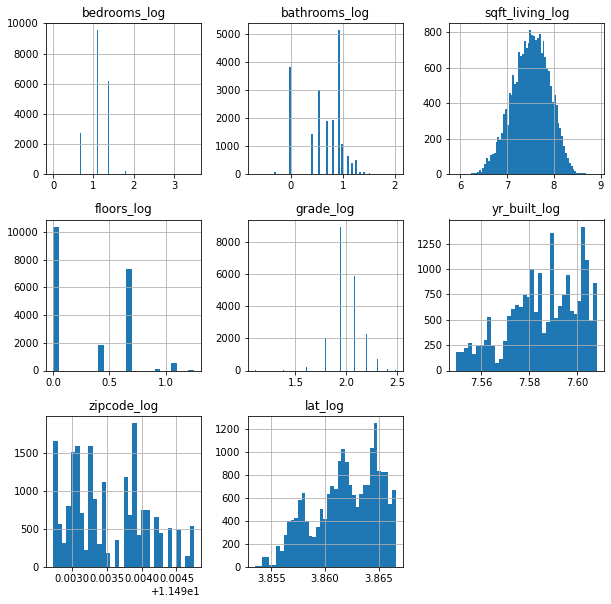

In [93]:
cats = ['const', 'waterfront', 'view', 'condition']
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'yr_built', 'zipcode', 'lat']
X_cats = X[cats]
X_cont = X[continuous]
log_names = [f'{column}_log' for column in X_cont.columns]
log_X = np.log(X_cont)
log_X.columns = log_names
log_X.hist(figsize = [10,10], bins = 'auto');

In [94]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [95]:
normaled_X = log_X.apply(normalize)

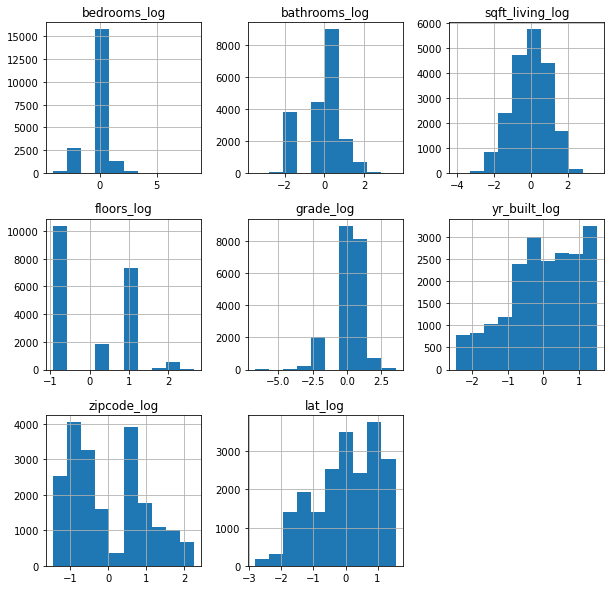

In [96]:
normaled_X.hist(figsize = [10,10]);

In [97]:
normaled_X2 = X_cats.join(normaled_X, how='inner')

In [98]:
normaled_X2

const  waterfront  view  condition  bedrooms_log  bathrooms_log  \
0        1.0           0     0          3     -0.231536      -1.699702   
1        1.0           0     0          3     -0.231536       0.430941   
2        1.0           0     0          3     -1.673166      -1.699702   
3        1.0           0     0          5      0.791317       1.186799   
4        1.0           0     0          3     -0.231536       0.121477   
...      ...         ...   ...        ...           ...            ...   
21592    1.0           0     0          3     -0.231536       0.707766   
21593    1.0           0     0          3      0.791317       0.707766   
21594    1.0           0     0          3     -1.673166      -2.455560   
21595    1.0           0     0          3     -0.231536       0.707766   
21596    1.0           0     0          3     -1.673166      -2.455560   

       sqft_living_log  floors_log  grade_log  yr_built_log  zipcode_log  \
0            -1.099525   -0.923787  -0.455015     -0.532502     1.864110   
1             0.881066    1.054140  -0.455015     -0.670507     0.870723   
2            -2.185705   -0.923787  -1.598651     -1.295050    -0.948753   
3             0.191613   -0.923787  -0.455015     -0.188721     1.076942   
4            -0.200618   -0.923787   0.535647      0.561478    -0.085685   
...                ...         ...        ...           ...          ...   
21592        -0.438592    2.211153   0.535647      1.303417     0.458216   
21593         0.609677    1.054140   0.535647      1.470906     1.264393   
21594        -1.470284    1.054140  -0.455015      1.303417     1.226904   
21595        -0.324763    1.054140   0.535647      1.135510    -0.967520   
21596        -1.470284    1.054140  -0.455015      1.269869     1.226904   

        lat_log  
0     -0.316242  
1      1.163478  
2      1.282391  
3     -0.248391  
4      0.429370  
...         ...  
21592  1.010730  
21593 -0.319776  
21594  0.271348  
21595 -0.151585  
21596  0.269231  

[20206 rows x 12 columns]

In [99]:
normaled_X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20206 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            20206 non-null  float64
 1   waterfront       20206 non-null  int32  
 2   view             20206 non-null  int64  
 3   condition        20206 non-null  int64  
 4   bedrooms_log     20206 non-null  float64
 5   bathrooms_log    20206 non-null  float64
 6   sqft_living_log  20206 non-null  float64
 7   floors_log       20206 non-null  float64
 8   grade_log        20206 non-null  float64
 9   yr_built_log     20206 non-null  float64
 10  zipcode_log      20206 non-null  float64
 11  lat_log          20206 non-null  float64
dtypes: float64(9), int32(1), int64(2)
memory usage: 2.6 MB


In [100]:
model4 = sm.OLS(endog=y_log, exog=normaled_X2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     4263.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:39:50   Log-Likelihood:                 189.61
No. Observations:               20206   AIC:                            -355.2
Df Residuals:                   20194   BIC:                            -260.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.7874      0.010   1289.289      0.000      12.768      12.807
waterfront          0.3087      0.035      8.709      0.000       0.239       0.378
view                0.0678      0.003     23.193      0.000       0.062       0.074
condition           0.0497      0.003     17.327      0.000       0.044       0.055
bedrooms_log       -0.0307      0.002    -13.548      0.000      -0.035      -0.026
bathrooms_log       0.0339      0.003     11.665      0.000       0.028       0.040
sqft_living_log     0.1561      0.003     48.112      0.000       0.150       0.162
floors_log          0.0390      0.002     18.424      0.000       0.035       0.043
grade_log           0.1618      0.003     61.545      0.000       0.157       0.167
yr_built_log       -0.1018      0.002    -41.093      0.000      -0.107      -0.097
zipcode_log        -0.0273      0.002    -14.335      0.000      -0.031      -0.024
lat_log             0.1926      0.002    106.188      0.000       0.189       0.196
==============================================================================
Omnibus:                      365.419   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              749.643
Skew:                          -0.044   Prob(JB):                    1.65e-163
Kurtosis:                       3.940   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     4145.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:39:50   Log-Likelihood:                -7.4549
No. Observations:               20206   AIC:                             38.91
Df Residuals:                   20194   BIC:                             133.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.6820      3.508      1.620      0.105      -1.194      12.558
bedrooms       -0.0150      0.002     -6.252      0.000      -0.020      -0.010
bathrooms       0.0637      0.004     15.636      0.000       0.056       0.072
sqft_living     0.0002   4.12e-06     42.306      0.000       0.000       0.000
floors          0.0678      0.004     16.752      0.000       0.060       0.076
waterfront      0.3150      0.036      8.800      0.000       0.245       0.385
view            0.0664      0.003     22.468      0.000       0.061       0.072
condition       0.0558      0.003     19.360      0.000       0.050       0.061
grade           0.1629      0.003     61.841      0.000       0.158       0.168
yr_built       -0.0034   8.59e-05    -39.673      0.000      -0.004      -0.003
zipcode        -0.0005   3.61e-05    -14.948      0.000      -0.001      -0.000
lat             1.3676      0.013    105.800      0.000       1.342       1.393
==============================================================================
Omnibus:                      396.145   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.720
Skew:                          -0.132   Prob(JB):                    1.43e-161
Kurtosis:                       3.900   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     4152.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:39:50   Log-Likelihood:            -2.9447e+05
No. Observations:               21597   AIC:                         5.890e+05
Df Residuals:                   21584   BIC:                         5.891e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.367e+07   2.83e+06      4.834      0.000    8.13e+06    1.92e+07
bedrooms    -3.591e+04   1898.551    -18.913      0.000   -3.96e+04   -3.22e+04
bathrooms     3.94e+04   3202.565     12.302      0.000    3.31e+04    4.57e+04
sqft_living   177.3970      3.083     57.541      0.000     171.354     183.440
floors       1.865e+04   3227.350      5.780      0.000    1.23e+04     2.5e+04
waterfront   6.221e+05   1.82e+04     34.240      0.000    5.87e+05    6.58e+05
view         5.306e+04   2079.830     25.514      0.000     4.9e+04    5.71e+04
condition     2.25e+04   2316.790      9.713      0.000     1.8e+04     2.7e+04
grade        1.043e+05   2038.028     51.185      0.000       1e+05    1.08e+05
yr_built    -2770.7010     69.083    -40.107      0.000   -2906.110   -2635.292
zipcode      -617.5825     32.941    -18.748      0.000    -682.149    -553.016
lat          5.947e+05   1.07e+04     55.807      0.000    5.74e+05    6.16e+05
long        -1.912e+05   1.25e+04    -15.286      0.000   -2.16e+05   -1.67e+05
==============================================================================
Omnibus:                    18255.676   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1787451.250
Skew:                           3.541   Prob(JB):                         0.00
Kurtosis:                      47.002   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
#find the residual values fromthe model
residuals4 = model4.resid
residuals4

0       -0.236999
1       -0.136065
2       -0.598514
3        0.397608
4        0.147349
           ...   
21592   -0.327634
21593   -0.013870
21594    0.375659
21595   -0.027066
21596    0.159774
Length: 20206, dtype: float64

In [104]:
print(residuals4.min())
print(residuals4.max())

-1.339539549856438
1.3957154823361506


In [105]:
y_pred4 = model4.fittedvalues
y_pred4

0        12.546981
1        13.331679
2        12.699226
3        12.913722
4        12.994817
           ...    
21592    13.121494
21593    12.913090
21594    12.528799
21595    12.926285
21596    12.531807
Length: 20206, dtype: float64

In [106]:
y_log

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21592    12.793859
21593    12.899220
21594    12.904459
21595    12.899220
21596    12.691580
Name: price, Length: 20206, dtype: float64

In [107]:
#taking the known sale price (y) and supraticting the predicted y for each entry, we can find a mean absolute error of the model.
mae_resid4 = np.mean(np.abs(y_log-y_pred4))
mae_resid4

0.18623988521963922

In [108]:
y_pred4.mean()

12.968393147298748

From the final model we can find answers to our question on what are the most import features for predicting the price of a home, can we accurately predict the price of a home and can we use our model to find homes that are below market value. 

By looking at are t-values, we can find our most significant features are the latitude, the square footage and the grade of the home. The latitude for the property cannot be changed as it is dependent on the location of the home, but with this we can learn that the further north we go into King County, the higher the property value. The grade and the square footage of the home can potentially improve with a remodel. We can also use these variables to begin to identify homes that are potentially being sold under market value. 

We can also find through our R-squared value that 69.9% of home values can be attributed to our independent variables. From our current variables we should be able to get a decent prediction on the market value of a home. There are other factors that will contribute to the value of the home, such as the neighborhood, school districts, garage and off street parking, and features on the lot such as mature trees, decks or pools.

Looking at the residuals for our models, we can get a quick view of homes that are on the market for below their predicted values. This could be used to help identify potential properties that are below market value or if there is some variable that can be improved to help increase the homes value. We can do this by looking for residuals with the larger negative values. 


In [109]:
prelim_X.lat.min()

47.1559

In [110]:
prelim_X.lat.max()

47.7776

Looking at the minimum and maximum latitude to get an idea on the range, we can see that all homes in our dataset are between 47.156 and 47.778. 

In [111]:
#add the residuals from our final model to our data.
X_residuals = pd.concat([prelim_X, residuals4], axis=1)

In [112]:
X_residuals

price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0      221900.0         3       1.00         1180     1.0           0     0   
1      538000.0         3       2.25         2570     2.0           0     0   
2      180000.0         2       1.00          770     1.0           0     0   
3      604000.0         4       3.00         1960     1.0           0     0   
4      510000.0         3       2.00         1680     1.0           0     0   
...         ...       ...        ...          ...     ...         ...   ...   
21592  360000.0         3       2.50         1530     3.0           0     0   
21593  400000.0         4       2.50         2310     2.0           0     0   
21594  402101.0         2       0.75         1020     2.0           0     0   
21595  400000.0         3       2.50         1600     2.0           0     0   
21596  325000.0         2       0.75         1020     2.0           0     0   

       condition  grade  yr_built  zipcode      lat         0  
0              3    7.0      1955    98178  47.5112 -0.236999  
1              3    7.0      1951    98125  47.7210 -0.136065  
2              3    6.0      1933    98028  47.7379 -0.598514  
3              5    7.0      1965    98136  47.5208  0.397608  
4              3    8.0      1987    98074  47.6168  0.147349  
...          ...    ...       ...      ...      ...       ...  
21592          3    8.0      2009    98103  47.6993 -0.327634  
21593          3    8.0      2014    98146  47.5107 -0.013870  
21594          3    7.0      2009    98144  47.5944  0.375659  
21595          3    8.0      2004    98027  47.5345 -0.027066  
21596          3    7.0      2008    98144  47.5941  0.159774  

[20206 rows x 13 columns]

In [113]:
#rename the column for residuals
X_residuals = X_residuals.rename({0: 'resids'}, axis='columns')

In [114]:
best_homes = X_residuals.sort_values('resids').head(20)


In [115]:
best_homes

price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
12539   90000.0         2       1.00          790     1.0           0     0   
2587   134000.0         2       1.50          980     2.0           0     0   
326    274975.0         3       2.50         3030     2.0           0     0   
12332  160000.0         2       1.00         1140     1.0           0     0   
1220   130000.0         3       1.00         1110     1.0           0     0   
18318  130000.0         3       1.00         1200     2.0           0     0   
7090   285000.0         4       3.50         2770     2.0           0     0   
16828  170000.0         1       0.75          850     1.0           0     2   
14255  130000.0         2       1.00          840     1.0           0     0   
9767   289275.0         3       2.00         2860     1.0           0     0   
16879  125000.0         3       1.00         1230     1.5           0     0   
12711  130000.0         3       1.00         1100     1.0           0     0   
4764   154000.0         2       1.00         1040     1.0           0     3   
16927  160000.0         3       1.00         1140     1.5           0     0   
7985    90000.0         1       1.00          780     1.0           0     0   
18973  140000.0         3       1.50         1200     2.0           0     0   
19173  345600.0         5       3.50         2800     2.5           0     0   
8267    82000.0         3       1.00          860     1.0           0     0   
5522   119500.0         3       1.00         1170     1.0           0     0   
18833  380000.0         3       2.50         1980     2.0           1     4   

       condition  grade  yr_built  zipcode      lat    resids  
12539          3    7.0      1973    98034  47.7351 -1.339540  
2587           3    7.0      1922    98014  47.7076 -1.292986  
326            3    9.0      1987    98077  47.7721 -1.152139  
12332          3    8.0      1980    98028  47.7637 -1.087647  
1220           4    7.0      1960    98033  47.6830 -1.087423  
18318          1    7.0      1908    98116  47.5883 -1.059802  
7090           3    8.0      1940    98133  47.7412 -1.031400  
16828          3    6.0      1903    98019  47.7654 -1.029823  
14255          3    7.0      1951    98133  47.7319 -1.017974  
9767           3    9.0      1985    98019  47.7718 -1.017711  
16879          1    6.0      1916    98117  47.6941 -1.006182  
12711          4    7.0      1913    98108  47.5231 -0.994533  
4764           3    6.0      1949    98014  47.6981 -0.973902  
16927          4    6.0      1910    98014  47.7093 -0.973152  
7985           3    5.0      1905    98108  47.5424 -0.947266  
18973          3    8.0      1966    98055  47.4659 -0.940718  
19173          3    9.0      1903    98122  47.6059 -0.938861  
8267           3    6.0      1954    98146  47.4987 -0.924726  
5522           2    6.0      1980    98019  47.7346 -0.915658  
18833          3   10.0      1984    98166  47.4551 -0.900046

In the above table we are looking at the 20 homes with the highest negative residual values. These homes are well below their predicted values. These homes should have potential for good investment opportunities. Using the independent variables with the strongest affect on our model (latitude, grade, and square foot of living space), we can identify a few homes that would be worth looking into to as potential investments. 